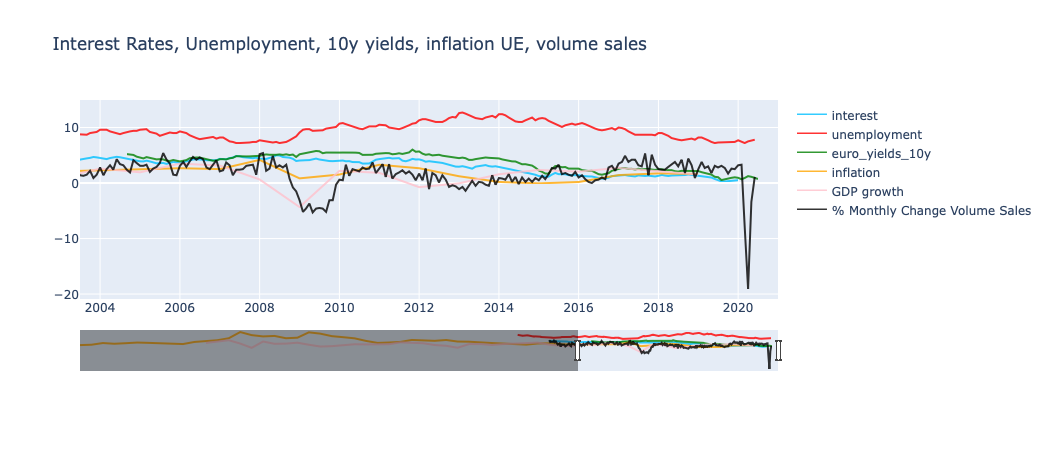

In [3]:
import pandas as pd
import requests
import json
import plotly.graph_objects as go

def checkindicator(url):
    r= requests.get(url)
    r = r.json()
    periods = r['series']['docs'][0]['period']
    values = r['series']['docs'][0]['value']
    dataset = r['series']['docs'][0]['dataset_name']

    indicators = pd.DataFrame(values,index=periods)

    indicators.columns = [dataset]

    return indicators   
    
euro_yields_10y = checkindicator('https://api.db.nomics.world/v22/series/Eurostat/irt_euryld_m/M.EA.INS_FWD.CGB_EA.Y10?observations=1')
unemployment = checkindicator('https://api.db.nomics.world/v22/series/Eurostat/une_rt_m/M.NSA.TOTAL.PC_ACT.T.EA19?observations=1')

interest = checkindicator('https://api.db.nomics.world/v22/series/Eurostat/ei_mfir_m/M.NSA.NAP.MF-LTGBY-RT.EU28?observations=1')
inflation = checkindicator('https://api.db.nomics.world/v22/series/WB/WDI/FP.CPI.TOTL.ZG-EU?observations=1')

#inflation.columns


GDPgrowth = checkindicator('https://api.db.nomics.world/v22/series/WB/WDI/NY.GDP.MKTP.KD.ZG-EU?observations=1')

monthly_change_retail_trade = checkindicator('https://api.db.nomics.world/v22/series/Eurostat/sts_trtu_m/M.TOVT.G47.CA.PCH_SM.EA19?observations=1')
monthly_change_retail_trade.columns


import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Scatter(
                x=interest.index,
                y=interest['Interest rates - monthly data'],
                name="interest",
                line_color='deepskyblue',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=unemployment.index,
                y=unemployment['Unemployment by sex and age – monthly data'],
                name="unemployment",
                line_color='red',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=euro_yields_10y.index,
                y=euro_yields_10y['Euro yield curves - monthly data'],
                name="euro_yields_10y",
                line_color='green',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=inflation.index,
                y=inflation['World Development Indicators'],
                name="inflation",
                line_color='orange',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=GDPgrowth.index,
                y=GDPgrowth['World Development Indicators'],
                name="GDP growth",
                line_color='pink',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=monthly_change_retail_trade.index,
                y=monthly_change_retail_trade['Turnover and volume of sales in wholesale and retail trade - monthly data'],
                name="% Monthly Change Volume Sales",
                line_color='black',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2003-07-01','2020-12-31'],
                  title_text="Interest Rates, Unemployment, 10y yields, inflation UE, volume sales",xaxis_rangeslider_visible=True)


fig.show()